In [1]:
ICESAT2_BOREAL_REPO_PATH = '/projects/Developer/icesat2_boreal' # /projects/Developer/icesat2_boreal/lib
ICESAT2_BOREAL_LIB_PATH = ICESAT2_BOREAL_REPO_PATH + '/lib'

In [ ]:
!pip install -U -r $ICESAT2_BOREAL_REPO_PATH/dps/requirements_main.txt

In [2]:
import geopandas
import pandas as pd
import os
import json
import collections
import numpy as np
import sys
import s3fs
import matplotlib.pyplot as plt
sys.path.append(ICESAT2_BOREAL_LIB_PATH)
import maplib_folium
import ExtractUtils
import pandas
import rasterio as rio
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
AGB_tindex_master_fn = 's3://maap-ops-workspace/shared/nathanmthomas/DPS_tile_lists/07/AGB_tindex_master.csv'
AGB_mosaic_json_fn   = 's3://maap-ops-workspace/shared/nathanmthomas/DPS_tile_lists/07/AGB_tindex_master_mosaic.json'

HLS_tindex_master_fn = 's3://maap-ops-workspace/shared/nathanmthomas/DPS_tile_lists/HLS_test_redo/spring2022/HLS_tindex_master.csv'
HLS_mosaic_json_fn   = 's3://maap-ops-workspace/shared/nathanmthomas/DPS_tile_lists/HLS_test_redo/spring2022/HLS_tindex_master_mosaic.json'

In [4]:
HLS_index = pandas.read_csv(HLS_tindex_master_fn)

In [5]:
HLS_index.head()

,Unnamed: 0,s3_path,local_path,file,tile_num
0,4166,s3://maap-ops-workspace/nathanmthomas/dps_outp...,/projects/my-private-bucket/dps_output/do_HLS_...,HLS_4441_06-01_09-15_2019_2021.tif,4441
1,4165,s3://maap-ops-workspace/nathanmthomas/dps_outp...,/projects/my-private-bucket/dps_output/do_HLS_...,HLS_4476_06-01_09-15_2019_2021.tif,4476
2,4164,s3://maap-ops-workspace/nathanmthomas/dps_outp...,/projects/my-private-bucket/dps_output/do_HLS_...,HLS_38433_06-01_09-15_2019_2021.tif,38433
3,4163,s3://maap-ops-workspace/nathanmthomas/dps_outp...,/projects/my-private-bucket/dps_output/do_HLS_...,HLS_3189_06-01_09-15_2019_2021.tif,3189
4,4162,s3://maap-ops-workspace/nathanmthomas/dps_outp...,/projects/my-private-bucket/dps_output/do_HLS_...,HLS_4536_06-01_09-15_2019_2021.tif,4536


In [6]:
tile = 1313

local_path = (HLS_index['local_path'][HLS_index['tile_num']==1313].values)[0]

local_path

'/projects/my-private-bucket/dps_output/do_HLS_stack_3-1-2_ubuntu/master/2022/spring2022/04/07/12/54/53/387242/HLS_1313_06-15_09-01_2019_2021.tif'

In [7]:
src = rio.open(local_path)

In [8]:
NDMI = src.read(10)

In [9]:
NDMI.shape

(3000, 3000)

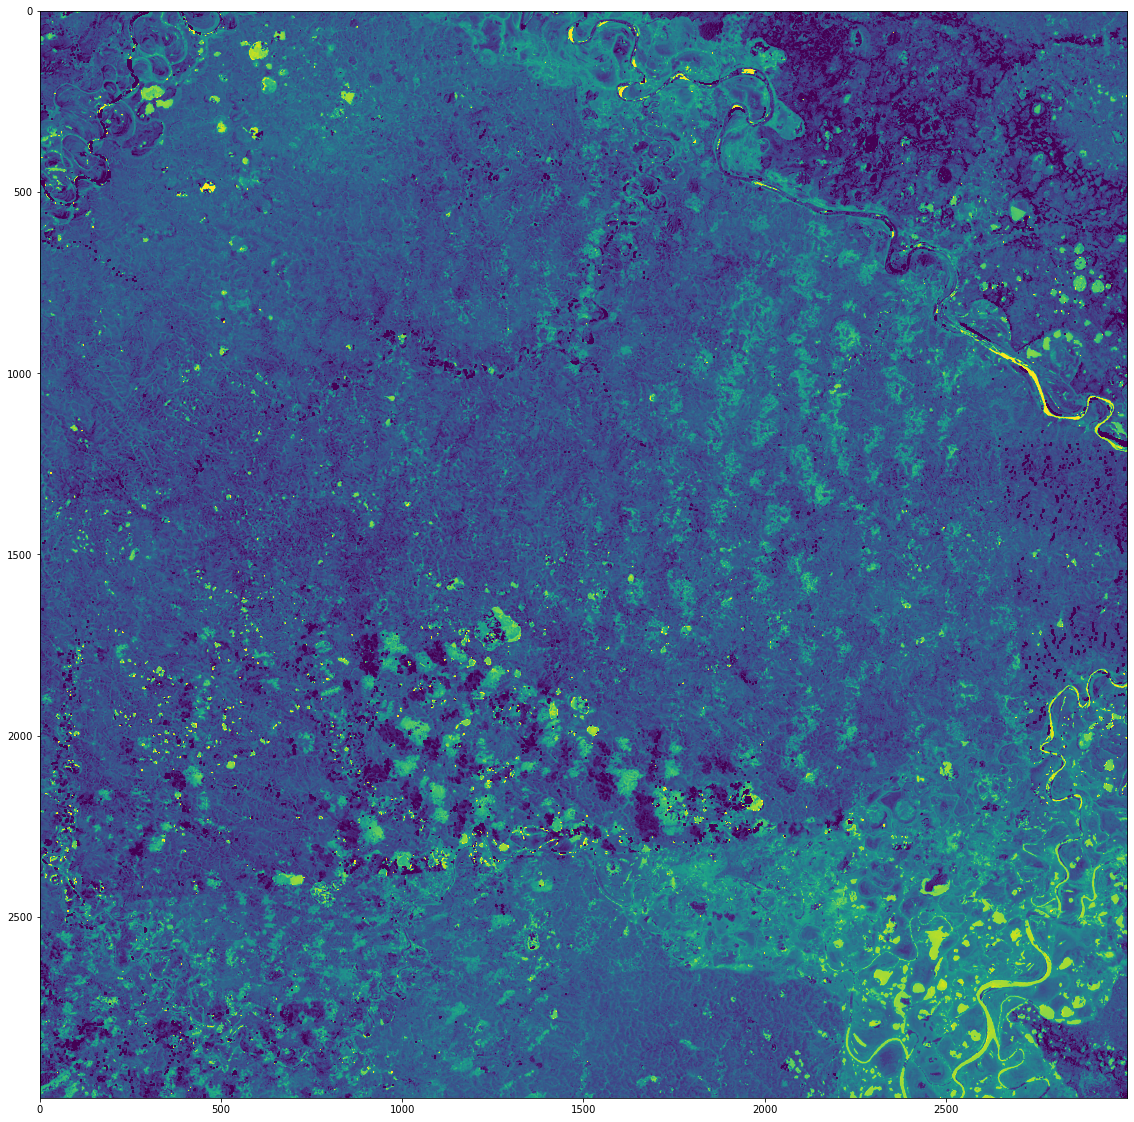

In [12]:
plt_1 = plt.figure(figsize=(20, 20))
plt.imshow(NDMI, vmin=0, vmax=0.7)

In [19]:
NDMI_mask = np.where(NDMI>0.5, 1, 0)

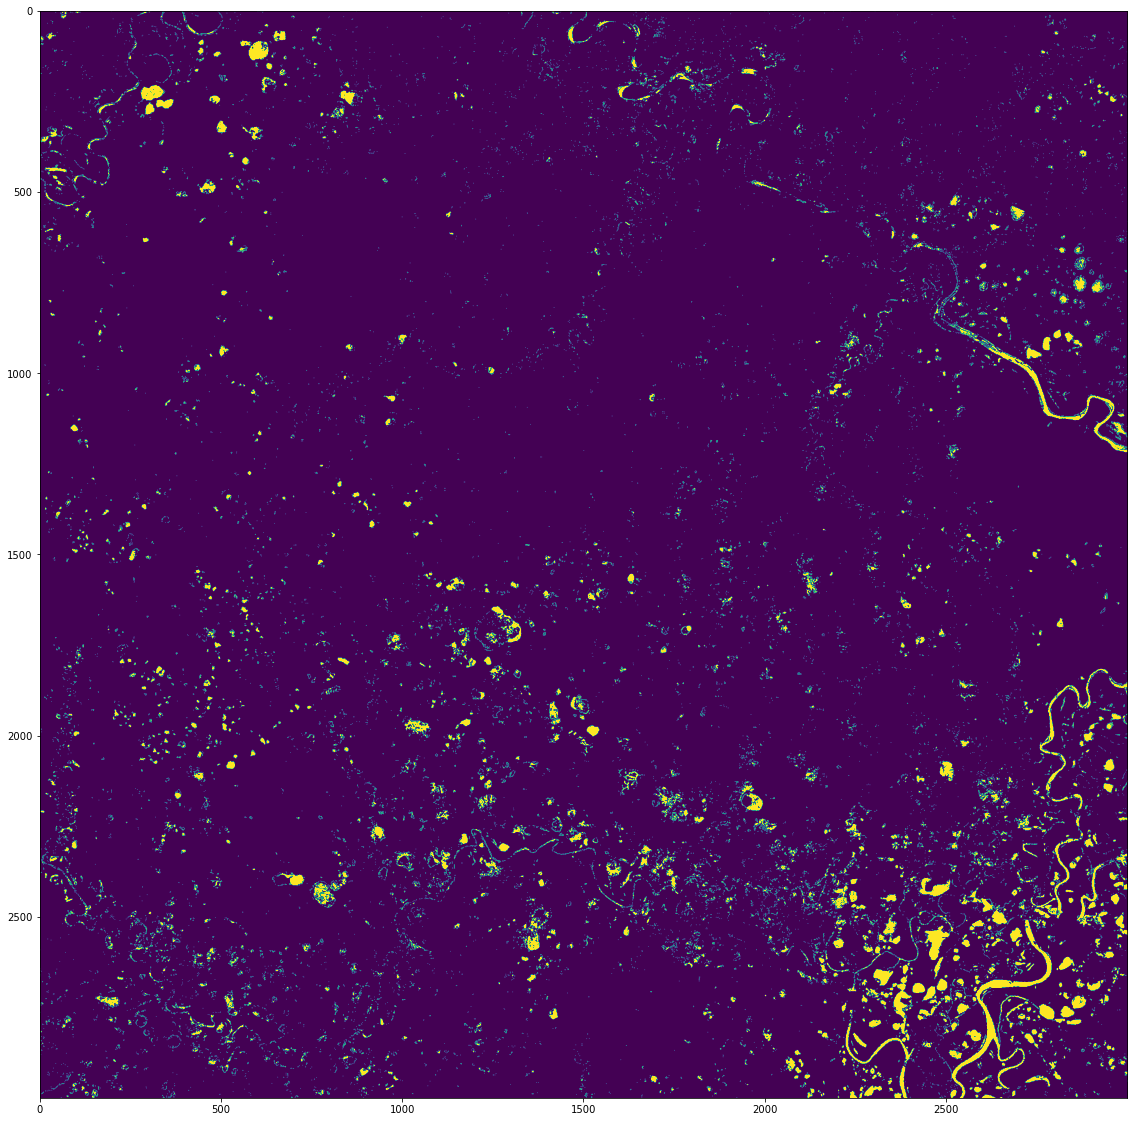

In [20]:
plt_1 = plt.figure(figsize=(20, 20))
plt.imshow(NDMI_mask, vmin=0, vmax=0.7)